In [1]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# import dask.dataframe as dd
# from mpl_interactions import ioff, panhandler, zoom_factory

import re


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# ddf = dd.read_hdf(os.path.join("../../../../Google Drive/My Drive/Data/ATPC/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
# ddf = dd.read_hdf(os.path.join("../data/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')

# file = "../data/PressureStudy/ATPC_0nubb_1bar.h5"

file = "../data/ATPC_0nubb/ATPC_0nubb_10bar_smear_1395.h5"

# file = "../data/PressureStudy/ATPC_0nubb_1bar.h5"
# file = "../data/PressureStudy/ATPC_gamma.h5"

# file = "../config/ATPC_Bi.h5"

event = 104700


hits = pd.read_hdf(file, 'MC/hits')
display(hits)
print(len(hits.event_id.unique()))

event_hits = hits[hits.event_id == event]

# parts = pd.read_hdf(file, 'parts')
# event_parts = parts[parts.event_id == event]
# display(event_parts)

display(event_hits)

,event_id,x,y,z,energy
0,104700,-2452.399902,2454.735596,2467.322266,0.013425
1,104700,-2452.535645,2453.995850,2467.438965,0.002275
2,104700,-2462.908447,2466.949707,2467.701172,0.055950
3,104700,-2451.812500,2456.766846,2467.981201,0.008250
4,104700,-2465.407471,2468.065186,2468.314209,0.018625
...,...,...,...,...,...
4349,104749,-503.181549,-2647.016602,3073.396484,0.019850
4350,104749,-499.867706,-2647.159668,3073.972656,0.042900
4351,104749,-494.259064,-2652.603760,3074.565674,0.021825
4352,104749,-497.930756,-2647.937500,3075.786865,0.013925


50


,event_id,x,y,z,energy
0,104700,-2452.399902,2454.735596,2467.322266,0.013425
1,104700,-2452.535645,2453.995850,2467.438965,0.002275
2,104700,-2462.908447,2466.949707,2467.701172,0.055950
3,104700,-2451.812500,2456.766846,2467.981201,0.008250
4,104700,-2465.407471,2468.065186,2468.314209,0.018625
...,...,...,...,...,...
82,104700,-2411.825439,2478.745117,2534.865723,0.032300
83,104700,-2415.586670,2480.285156,2537.887939,0.022050
84,104700,-2640.451172,2388.451172,3641.528564,0.032775
85,104700,-2468.458008,2186.783691,3792.645508,0.034600


In [3]:
# Make a 3D view of the track
%matplotlib widget

def PlotEvent(axis, file_, title, eid):

    hits = pd.read_hdf(file_, 'MC/hits')
    event_hits = hits[hits.event_id == eid]

    # Create 3D axes
    ax = fig.add_subplot(axis)

    fig.set_facecolor('black')
    ax.set_facecolor('black')
    # ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_z+3000, s=50)
    ax.scatter(event_hits.x, event_hits.y,c= event_hits.energy, cmap='Spectral', s=10, label = "reco hits")

    ax.set_xlabel("x [mm]", fontsize = 15)
    ax.set_ylabel("y [mm]", fontsize = 15)
    plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # Set the color of the spines (borders) to white
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.set_title(title, fontsize = 15, color='white')

    fig.tight_layout()





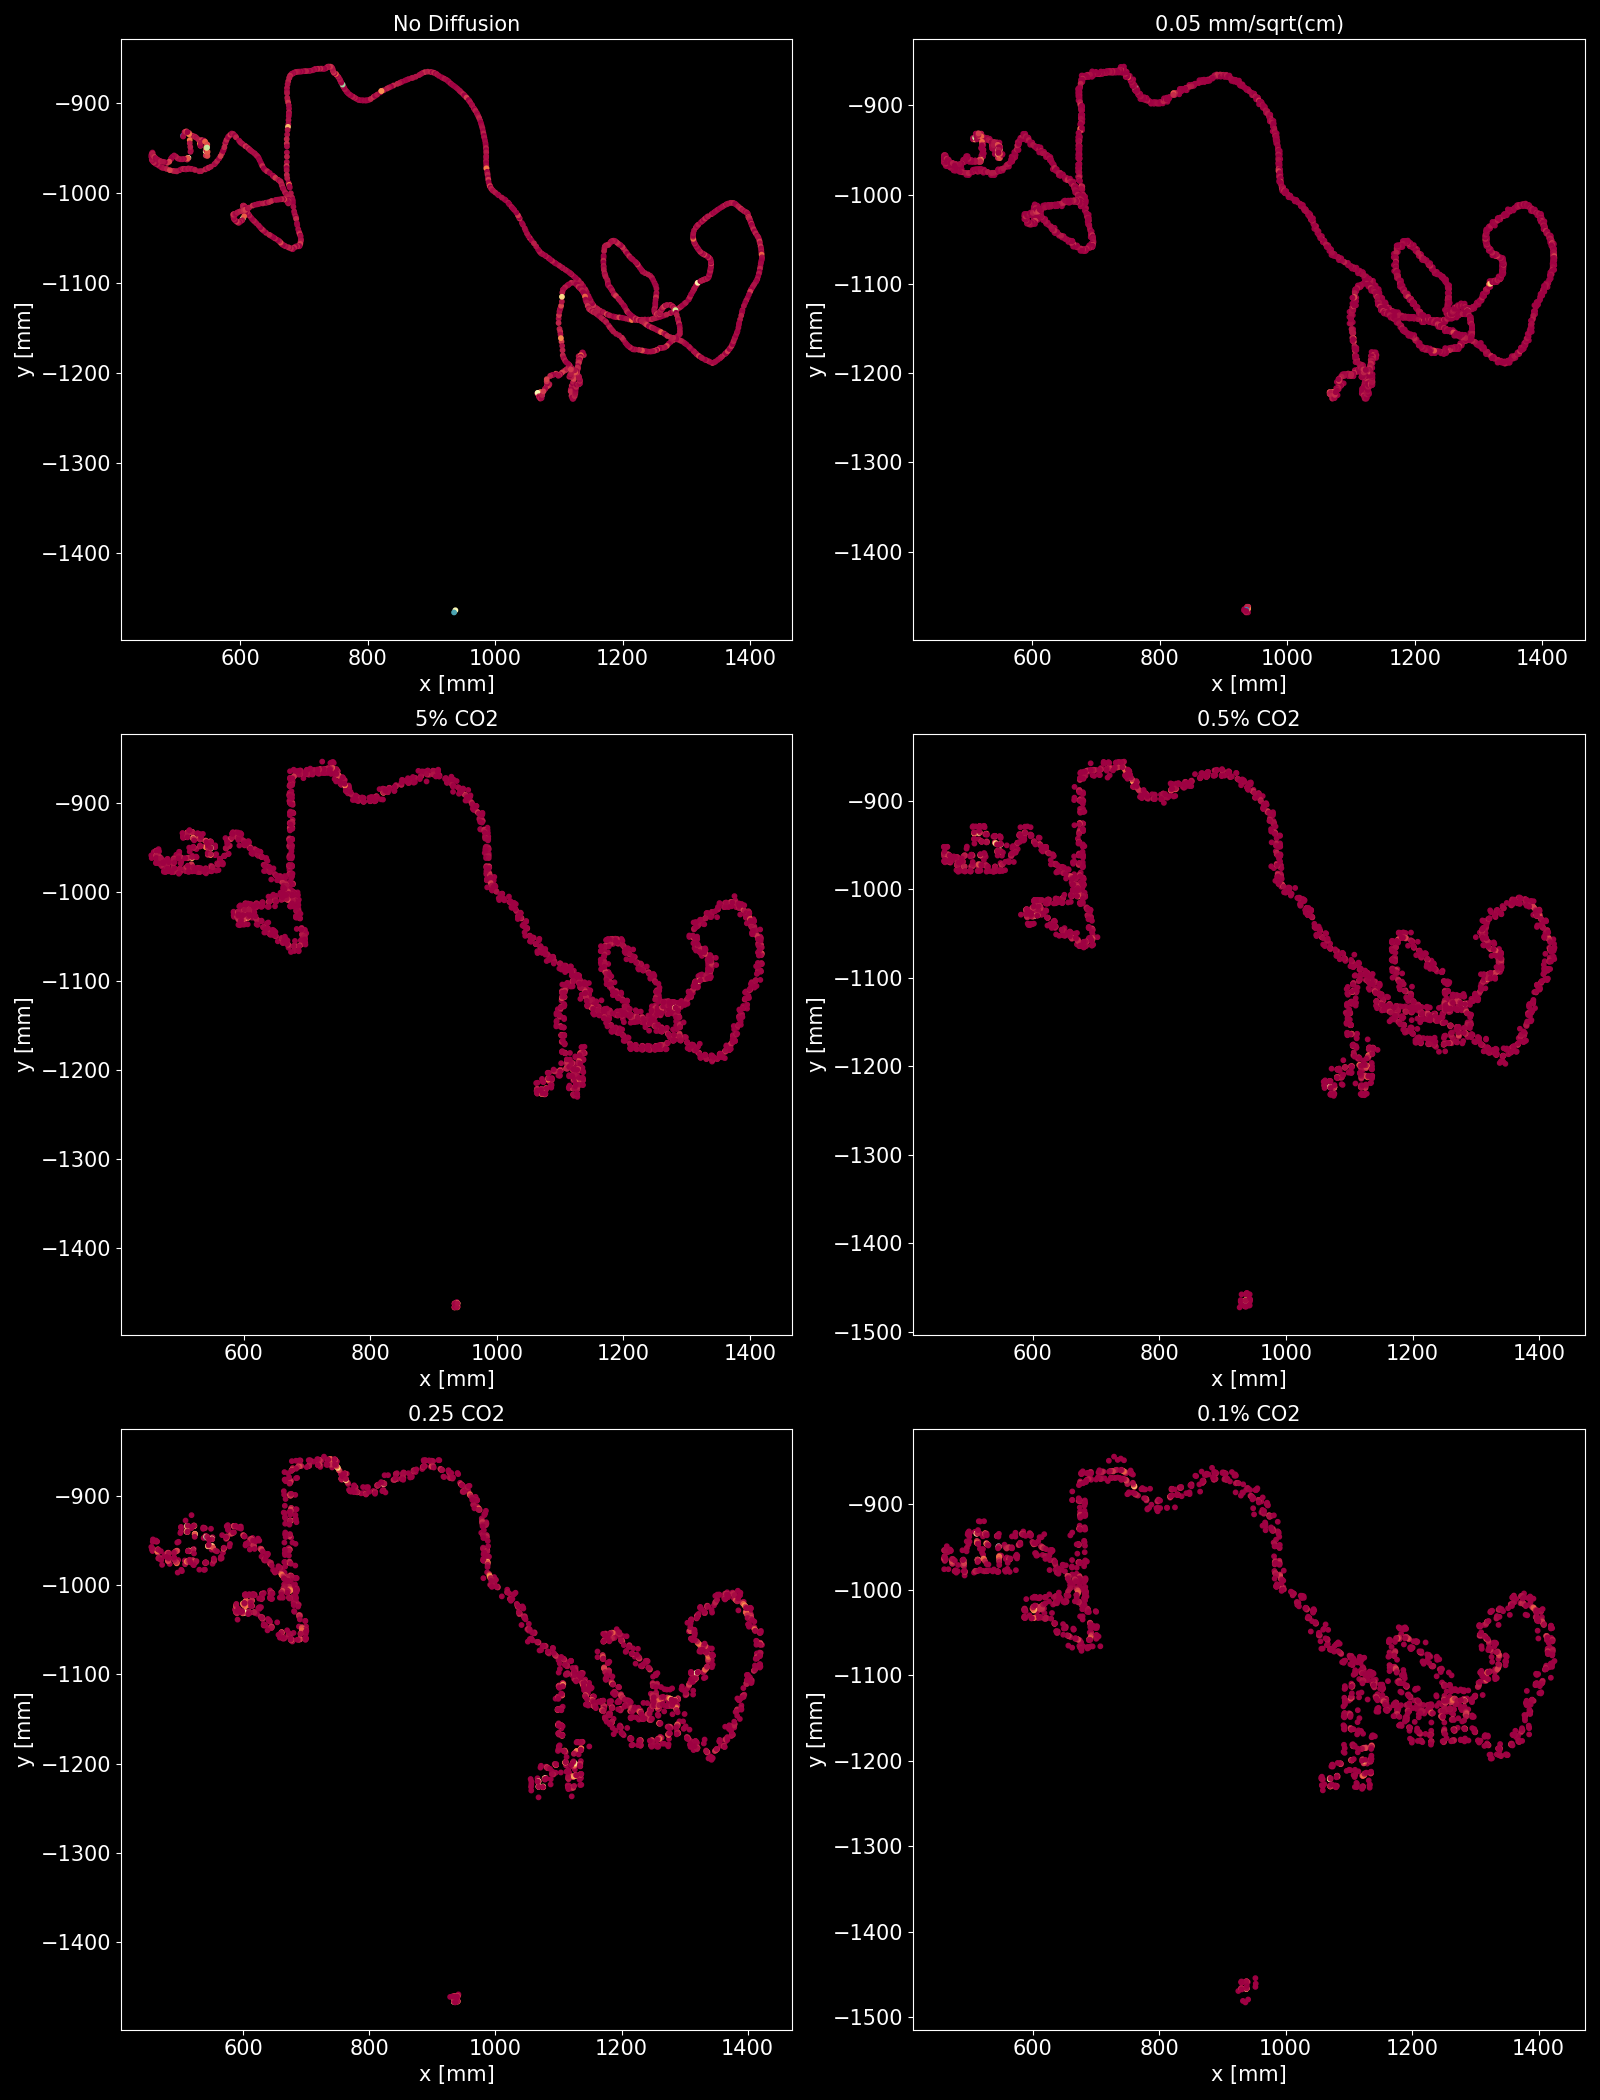

In [4]:


fig  = plt.figure(figsize=(16, 7*3))

hits = pd.read_hdf("../data/ATPC_0nubb/ATPC_0nubb_1bar_smear_2158.h5", 'MC/hits')
eid = hits["event_id"].unique()[7]


PlotEvent(321, "../data/ATPC_0nubb/ATPC_0nubb_1bar_smear_2158.h5", "No Diffusion", eid)
PlotEvent(322, "../data/ATPC_0nubb/ATPC_0nubb_1bar_0.05percent_smear_2158.h5", "0.05 mm/sqrt(cm)", eid)
PlotEvent(323, "../data/ATPC_0nubb/ATPC_0nubb_1bar_5.0percent_smear_2158.h5", "5% CO2", eid)
PlotEvent(324, "../data/ATPC_0nubb/ATPC_0nubb_1bar_0.5percent_smear_2158.h5", "0.5% CO2", eid)
PlotEvent(325, "../data/ATPC_0nubb/ATPC_0nubb_1bar_0.25percent_smear_2158.h5", "0.25 CO2", eid)
PlotEvent(326, "../data/ATPC_0nubb/ATPC_0nubb_1bar_0.1percent_smear_2158.h5", "0.1% CO2", eid)



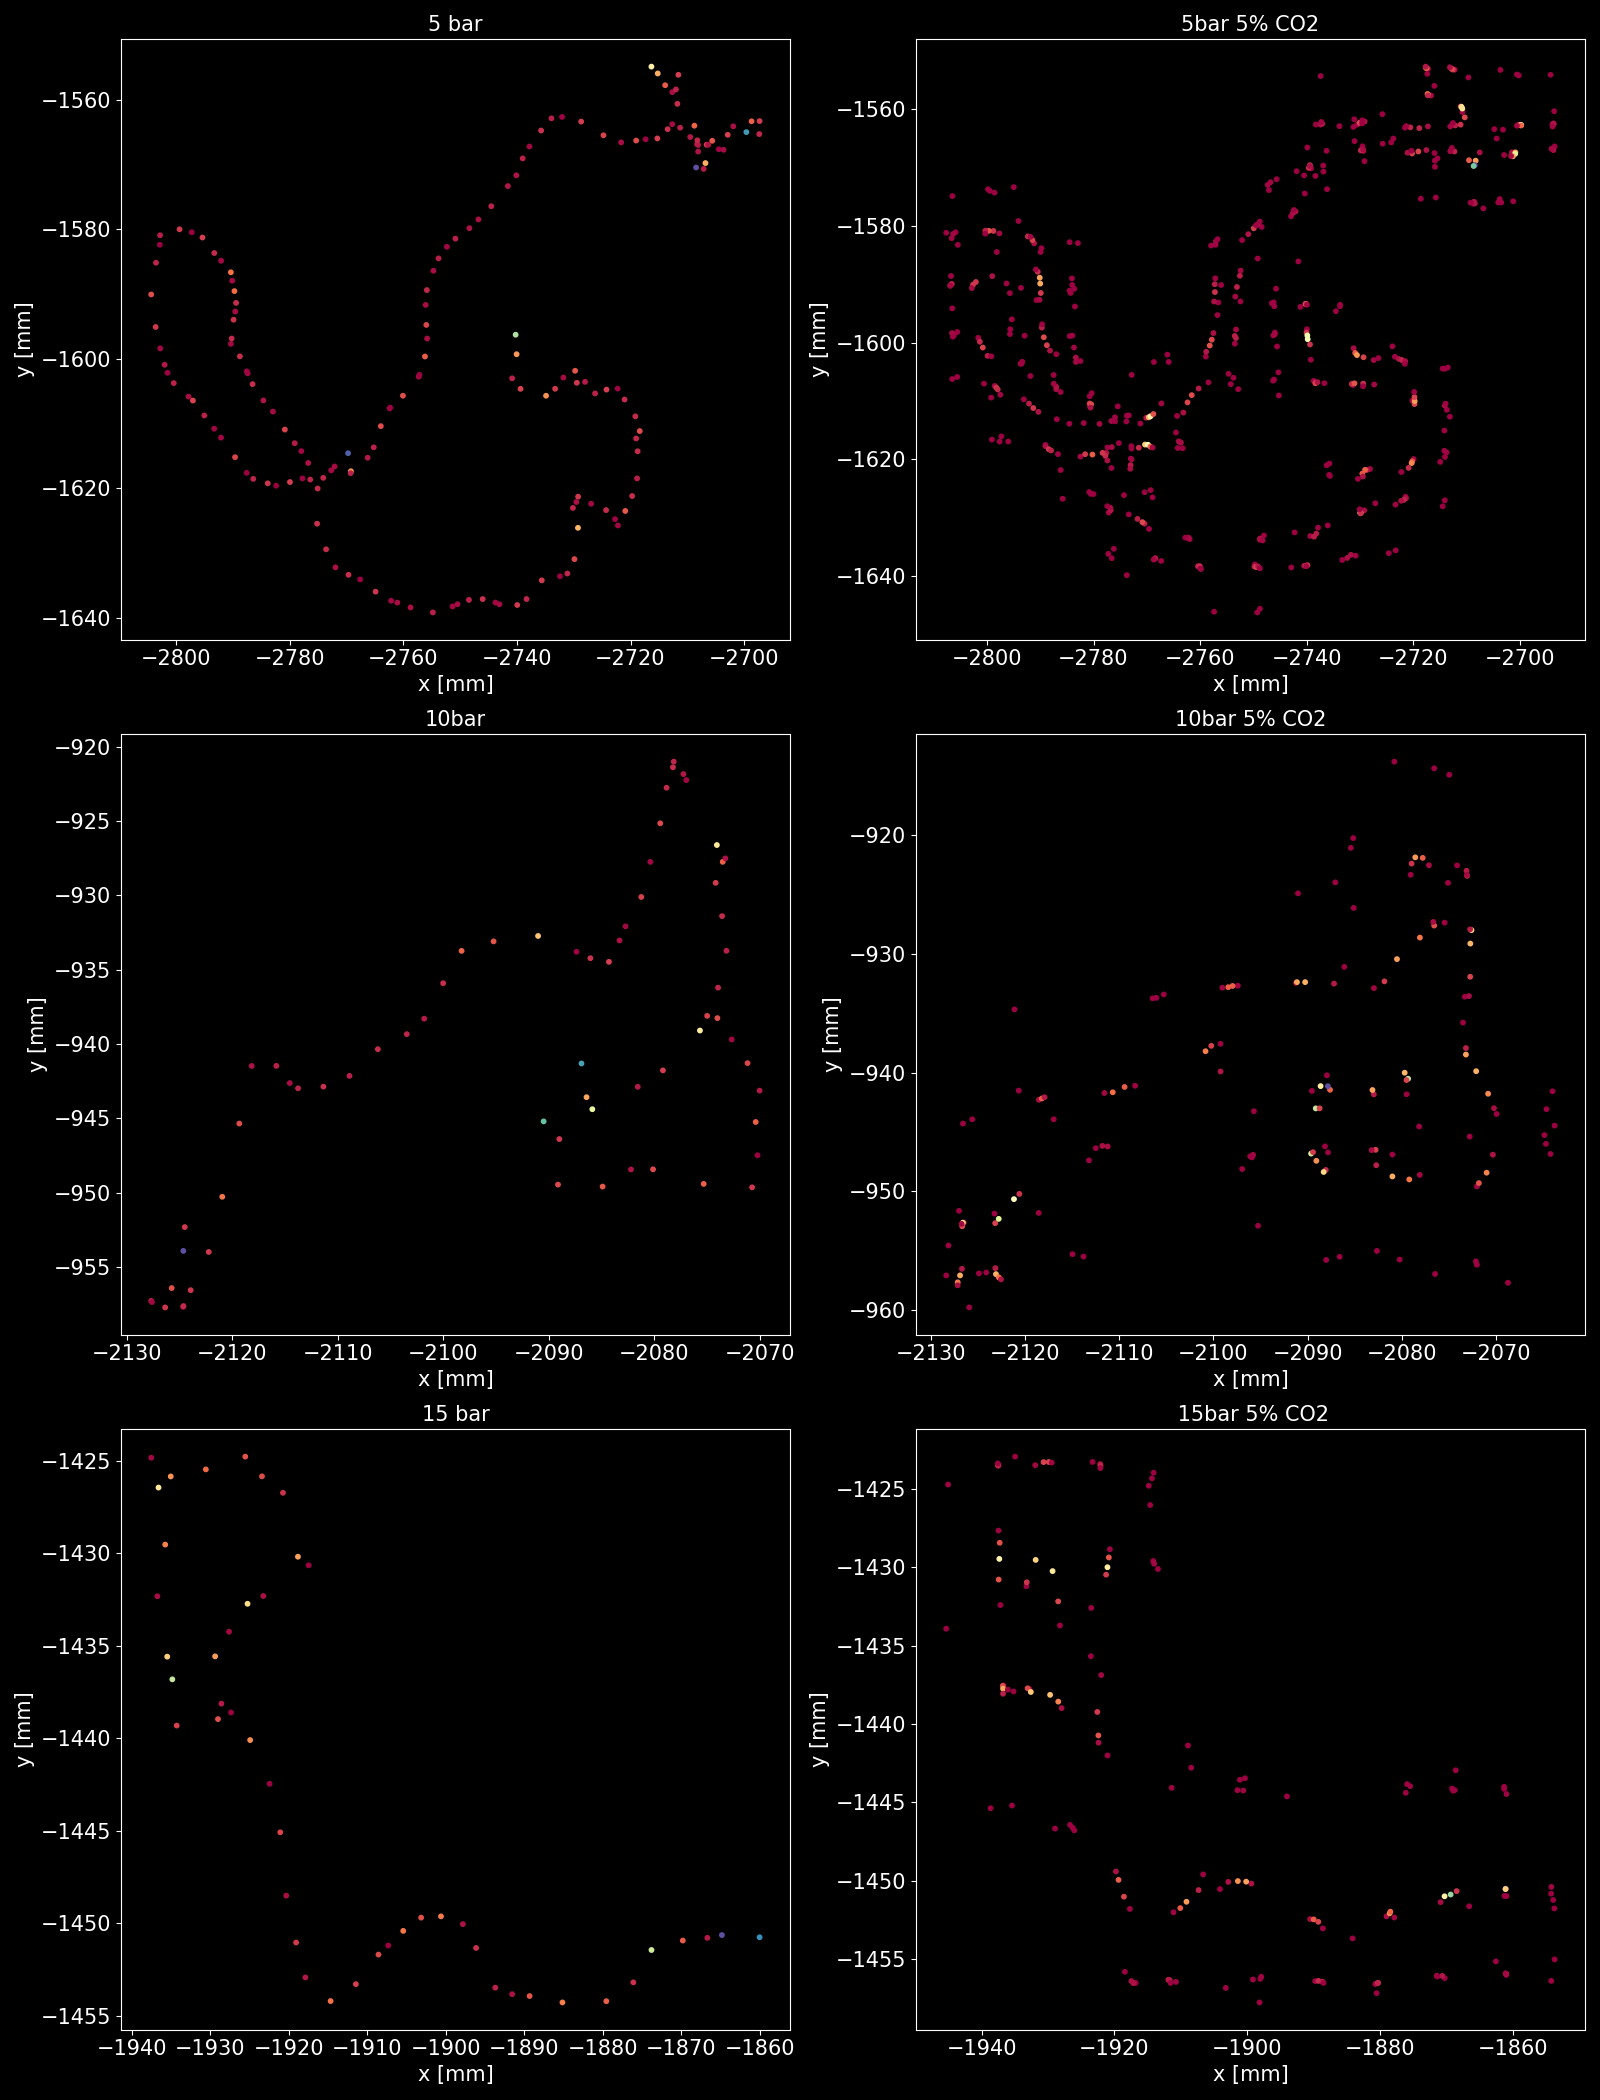

In [8]:


fig  = plt.figure(figsize=(16, 7*3))


hits = pd.read_hdf("../data/ATPC_0nubb/ATPC_0nubb_5bar_smear_1395.h5", 'MC/hits')
eid = hits["event_id"].unique()[2]

PlotEvent(321, "../data/ATPC_0nubb/ATPC_0nubb_5bar_smear_1395.h5", "5 bar", eid)
PlotEvent(322, "../data/ATPC_0nubb/ATPC_0nubb_5bar_5.0percent_smear_1395.h5", "5bar 5% CO2", eid)
PlotEvent(323, "../data/ATPC_0nubb/ATPC_0nubb_10bar_smear_1395.h5", "10bar", eid)
PlotEvent(324, "../data/ATPC_0nubb/ATPC_0nubb_10bar_5.0percent_smear_1395.h5", "10bar 5% CO2", eid)
PlotEvent(325, "../data/ATPC_0nubb/ATPC_0nubb_15bar_smear_1395.h5", "15 bar", eid)
PlotEvent(326, "../data/ATPC_0nubb/ATPC_0nubb_15bar_5.0percent_smear_1395.h5", " 15bar 5% CO2", eid)



# PlotEvent(321, file, "0.1% CO2", 103275)

# plt.savefig("plots/diffusion_amounts.png", dpi = 300)


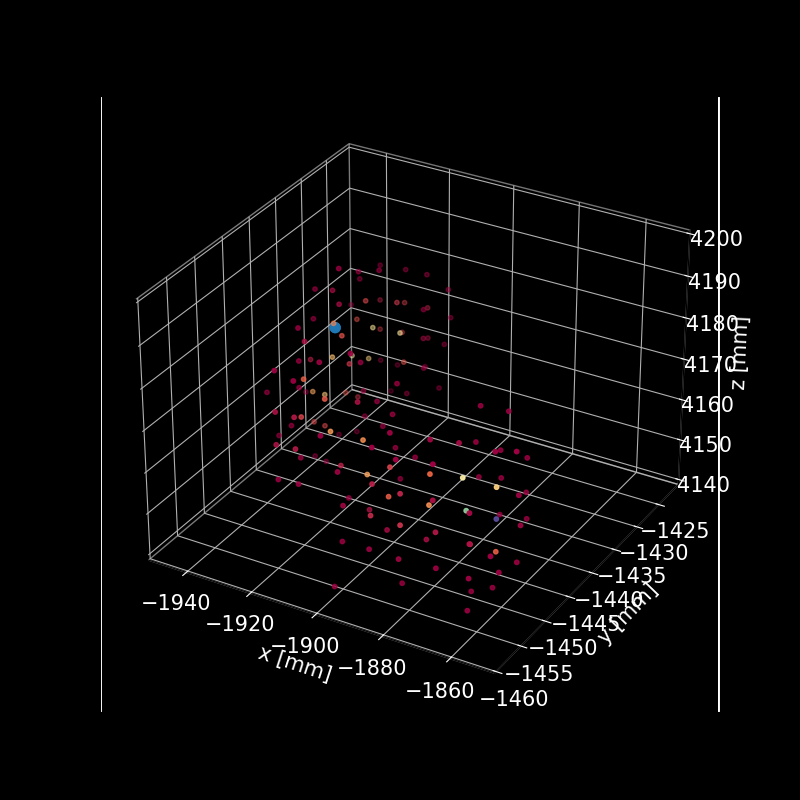

In [9]:
%matplotlib widget


# file = "../data/ATPC_0nubb/ATPC_0nubb_15bar_smear_1395.h5"
file = "../data/ATPC_0nubb/ATPC_0nubb_15bar_5.0percent_smear_1395.h5"

hits = pd.read_hdf(file, 'MC/hits')
parts = pd.read_hdf(file, 'MC/particles')
eid = hits["event_id"].unique()[2]

event_hits = hits[hits.event_id == eid]
event_parts = parts[parts.event_id == eid]

fig, axis = plt.subplots(figsize=(8, 8))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=10, label = "reco hits")
ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_y, event_parts[event_parts.primary==1].initial_z+3000, s=50)

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


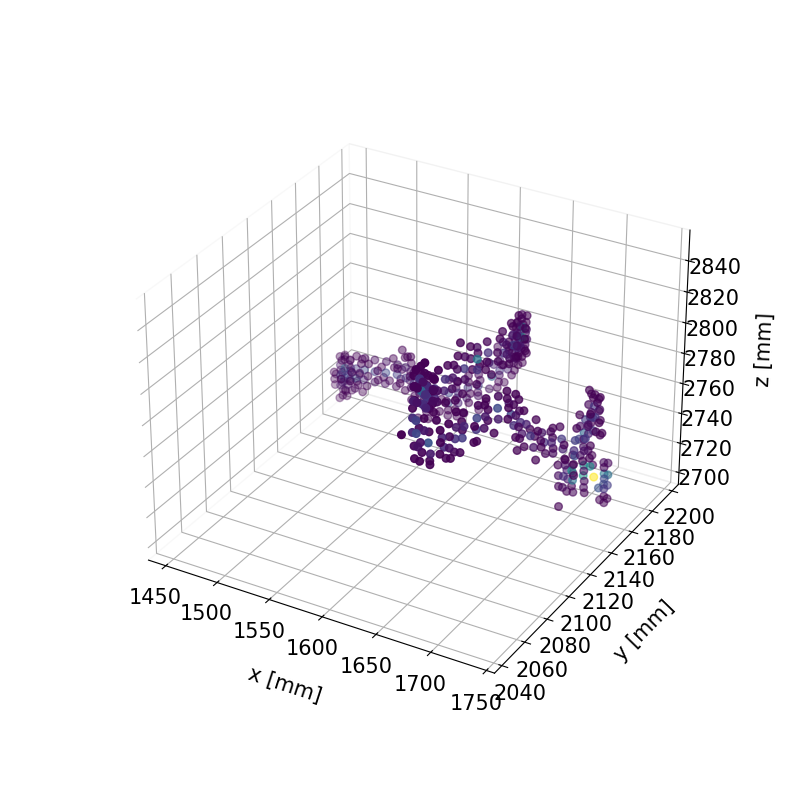

In [10]:
%matplotlib widget


file = "../data/ATPC_0nubb/ATPC_0nubb_5bar_5.0percent_smear_1395.h5"
# file = "../data/ATPC_0nubb/ATPC_0nubb_15bar_5.0percent_smear_1395.h5"

file = "../data/ATPC_gamma/ATPC_Tl_5bar_5.0percent_smear_1541.h5"

hits = pd.read_hdf(file, 'MC/hits')
parts = pd.read_hdf(file, 'MC/particles')
eid = hits["event_id"].unique()[8]

event_hits = hits[hits.event_id == eid]
event_parts = parts[parts.event_id == eid]

fig = plt.figure(figsize=(8, 8))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('white')
ax.set_facecolor('white')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='viridis', s=30, label = "reco hits")
# ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_y, event_parts[event_parts.primary==1].initial_z+3000, s=50)

ax.set_xlabel("x [mm]", fontsize = 15, labelpad=15)
ax.set_ylabel("y [mm]", fontsize = 15, labelpad=15)
ax.set_zlabel("z [mm]", fontsize = 15, labelpad=15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# ax.zaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


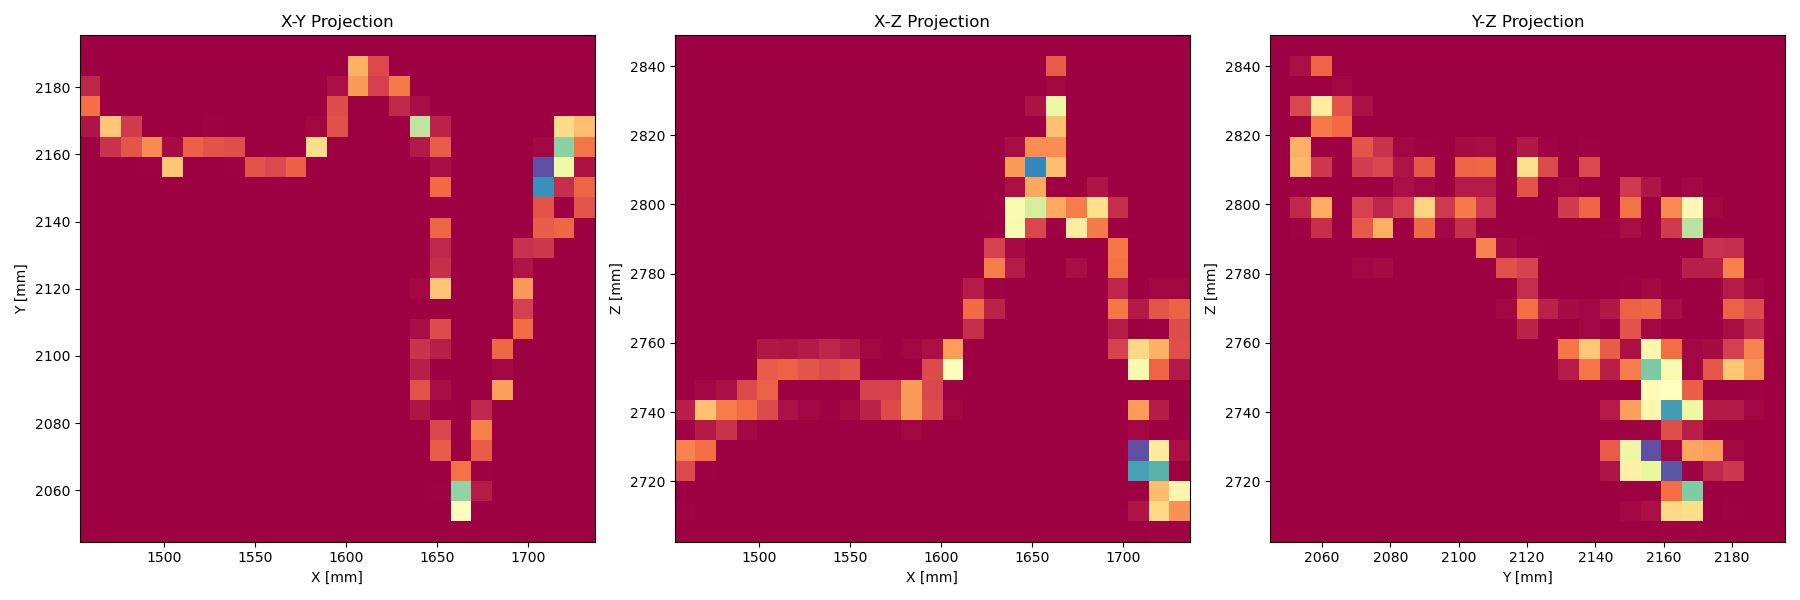

In [11]:
# Function to plot connections
def plot_connections(ax, x, y,energy, x_label, y_label):
    # ax.scatter(x, y, c= energy)
    h = ax.hist2d(x, y, bins=25, weights=energy, cmap='Spectral')
    ax.set_xlabel(f'{x_label} [mm]')
    ax.set_ylabel(f'{y_label} [mm]')
    ax.set_title(f'{x_label}-{y_label} Projection')
    

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot xy projection
plot_connections(axs[0], event_hits['x'], event_hits['y'],event_hits['energy'], 'X', 'Y')

# Plot xz projection
plot_connections(axs[1], event_hits['x'], event_hits['z'],event_hits['energy'], 'X', 'Z')

# Plot yz projection
plot_connections(axs[2], event_hits['y'], event_hits['z'],event_hits['energy'], 'Y', 'Z')

plt.tight_layout()
plt.show()
plt.savefig("/Users/mistryk2/Desktop/2D_Projection.png")